<a href="https://colab.research.google.com/github/hfelizzola/Curso-Estadistica/blob/main/Intervalos_Confianza.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Intervalos de confianza y pruebas de hipótesis

In [1]:
import numpy as np
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt

## Intervalos de confianza para medias

- Un ingeniero de producción esta interesado en controlar el tiempo promedio $(\mu)$ de una operación de corte en el proceso de fabricación de mesas de madera.

- Suponga que en la tabla se tienen todos los tiempo de las operaciones (universo) en una rango de hora en particular.
- $\mu$ (tiempo promedio) y $\sigma$ (desviación estándar) son los parámetros del universo que nos interesa estimar.
- Para esto cada hora toma muestra de $n=5$ operaciones y registra la media muestral.
- ¿Seleccione 5 valores aleatoriamente y calcule la media y desviación muestral? ¿Qué observa?
- Suponga que se sabe del universo: 
    - $\mu = 15 \text{ min}$
    - $\sigma = 2.1 \text{ min}$

In [2]:
tiempo = np.array([14.6, 18, 15.6, 16.6, 13.7])
tiempo

array([14.6, 18. , 15.6, 16.6, 13.7])

Este código de Python calcula un intervalo de confianza para la media de una población normal, utilizando la distribución normal estándar. `stats.norm.interval(confidence=0.95, loc=media, scale=desv_est/np.sqrt(n))` utiliza la función interval de la biblioteca `scipy.stats.norm` para calcular el intervalo de confianza del 95% para la media poblacional. Los parámetros son:

- `confidence=0.95`: indica el nivel de confianza deseado, en este caso del 95%.
- `loc=media`: indica la media muestral calculada anteriormente.
- `scale=desv_est/np.sqrt(n)`: indica el error estándar de la media, que se calcula dividiendo la desviación estándar de la muestra por la raíz cuadrada del tamaño de la muestra.

In [3]:
# Calcular la media de la variable tiempo
media = np.mean(tiempo)

sigma = 2.1

# Calcular el tamaño de la muestra
n = len(tiempo)

# Calcular el intervalo de confianza para la media poblacional de la variable tiempo
stats.norm.interval(confidence=0.95, loc=media, scale=sigma/np.sqrt(n))

(13.859302664789181, 17.540697335210822)

Para la calcula el intervalo con la distribución t-student se debe calcular la desviación estandar muestra `desv_est = np.std(tiempo, ddfo=1)` y luego se utiliza la función `stats.t.interval`:

In [4]:
# Calcular la desviación estandar muestral
desv_est = np.std(tiempo, ddof=1)

# Calcular el intervalo con la distribución t
stats.t.interval(loc=media, scale=desv_est/np.sqrt(n), df=n-1, confidence=0.95)

(13.611197845426219, 17.788802154573787)

A continuación, se muestra como construir una función que calcula el intervalo de confianza para la media poblacional de una variable.
    
__Parámetros:__
- data: lista o array de datos de la variable.
- confianza: nivel de confianza deseado (entre 0 y 1).
- sigma: la desviación estandar de la población

__Retorna:__
- intervalo: una tupla con los límites inferior y superior del intervalo de confianza.

*En este función por defecto vamos a calcular el intervalo con la distribución t-student*

In [5]:
# Por defecto vamos a calcular e
def intervalo_confianza_media(data, confianza, distribucion_t=True, sigma=None):
    # Calcular la media de la variable
    media = np.mean(data)

    # Calcular el tamaño de la muestra
    n = len(data)
    
    # Calcular el intervalo con la distribución t
    if distribucion_t:
        # Calcular la desviación estandar muestral
        desv_est = np.std(data, ddof=1)

        # Calcular el intervalo con la distribución t
        intervalo = stats.t.interval(loc=media, scale=desv_est/np.sqrt(n), df=n-1, confidence=confianza)
    else:  
        # Calcular el intervalo de confianza para la media poblacional de la variable
        intervalo = stats.norm.interval(confidence=confianza, loc=media, scale=sigma/np.sqrt(n))

    return intervalo

In [6]:
# Calculo de intervalo con distribución t
intervalo_confianza_media(data=tiempo, confianza=0.95)

(13.611197845426219, 17.788802154573787)

In [7]:
# Calculo de intervalo con distribución normal
intervalo_confianza_media(data=tiempo, confianza=0.95, distribucion_t=False, sigma=2.1)

(13.859302664789181, 17.540697335210822)

La principal ventaja de utilizar una función es que permite encapsular un conjunto de instrucciones en un bloque reutilizable de código. Esto tiene varias ventajas, como:

- __Modularidad:__ Al encapsular un conjunto de instrucciones en una función, se puede modularizar el código y separar diferentes responsabilidades en bloques de código independientes y reutilizables.
- __Legibilidad:__ Al utilizar una función con un nombre descriptivo, el código se hace más legible y fácil de entender.
- __Reutilización:__ Una función puede ser reutilizada varias veces en diferentes partes del código, evitando la repetición de código y aumentando la eficiencia del desarrollo.
- __Mantenibilidad:__ Al encapsular el código en una función, es más fácil de mantener y actualizar, ya que cualquier cambio en el código solo tiene que hacerse en un lugar.

Recuerde que en clase calculamos intervalos de confianza con diferentes muestras. A continuación, se muestra como reutilizar el código para calcular estos intervalos:

In [8]:
# Guardar los datos en listas independientes
m1 = [15.9, 12.8, 20.0, 11.0, 10.3, 14.2, 13.1]
m2 = [12.8, 19.2, 12.5, 14.8, 11.5, 15.6, 13.6]
m3 = [19.2, 15.7, 13.6, 19.7, 16.7, 15.6, 14.2]
m4 = [12.8, 14.6, 14.8, 16.7, 15.6, 14.1, 16.9]
m5 = [15.6, 15.0, 10.3, 19.7, 14.8, 16.6, 12.8]
m6 = [16.9, 15.0, 15.6, 13.6, 14.2, 13.6, 19.2]
m7 = [19.2, 15.7, 13.6, 19.7, 16.7, 15.6, 20.0]

# Crear un tabla (DataFrame) con cada muestra
muestras = pd.DataFrame({
    "M1":m1,
    "M2":m2,
    "M3":m3,
    "M4":m4,
    "M5":m5,
    "M6":m6,
    "M7":m7
})
muestras

,M1,M2,M3,M4,M5,M6,M7
0,15.9,12.8,19.2,12.8,15.6,16.9,19.2
1,12.8,19.2,15.7,14.6,15.0,15.0,15.7
2,20.0,12.5,13.6,14.8,10.3,15.6,13.6
3,11.0,14.8,19.7,16.7,19.7,13.6,19.7
4,10.3,11.5,16.7,15.6,14.8,14.2,16.7
5,14.2,15.6,15.6,14.1,16.6,13.6,15.6
6,13.1,13.6,14.2,16.9,12.8,19.2,20.0


In [9]:
# Recorrer todas las columnas con un ciclo for
for col in muestras.columns:
    # Imprime en consola el calculo del intervalo de confianza para cada muestra
    print(intervalo_confianza_media(data=muestras[col], confianza=0.95))

(10.867220344311457, 16.93277965568854)
(11.904690828365506, 16.66673774306306)
(14.228999535645002, 18.54242903578357)
(13.72725477378027, 16.415602369076872)
(12.2494296830012, 17.693427459855943)
(13.562698476923119, 17.323015808791165)
(14.945472034417374, 19.483099394154056)


Ahora vamos a graficar el primer intervalo calculado:

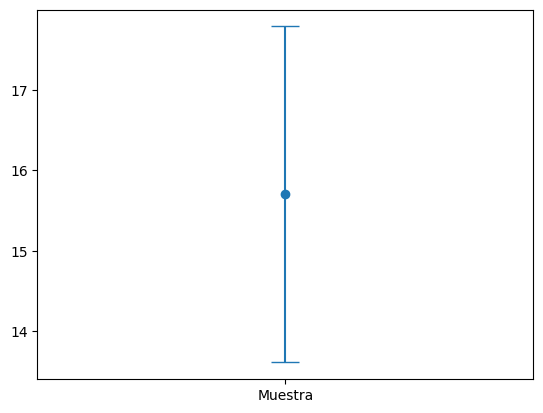

In [10]:
ic_mu = intervalo_confianza_media(data=tiempo, confianza=0.95)

# Calcular la media: recuerde que la media es el punto medio del intervalo
media = (ic_mu[1] + ic_mu[0])/2

# Calcular el margen de error: recuerde que es la distancia entre la media y alguno de los intervalos
me = media - ic_mu[0]

# Gráfica el intervalo
plt.errorbar(x=1, y=media, yerr=me, fmt='o', capsize=10)
plt.xticks(ticks=[1], labels=['Muestra'])
plt.show()

Con el bloque de código armamos una función tal como se muestra a continuación:

In [11]:
def plot_intervalo(ic_mu, x=1, muestra='Muestra'):
    media = (ic_mu[1] + ic_mu[0])/2
    me = media - ic_mu[0]
    plt.errorbar(x=x, y=media, yerr=me, fmt='o', capsize=10, label=muestra)

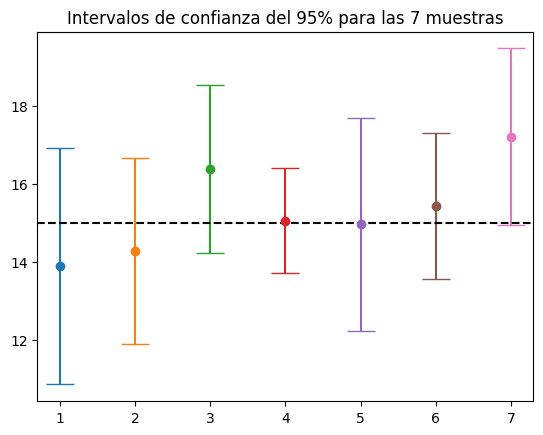

In [12]:
# Recorre todas las columnas de la tabla para graficar los intervalos
for i,col in enumerate(muestras.columns):
    ic_mu = intervalo_confianza_media(data=muestras[col], confianza=0.95)
    plot_intervalo(ic_mu, x=i+1, muestra=col)

# Agregar elementos al gráfico    
plt.axhline(y=15, color='black', linestyle='--')
plt.title("Intervalos de confianza del 95% para las 7 muestras")
plt.show()

## Intervalo de confianza para la varianza

In [13]:
# Calcular la varianza muestral de la variable 'tiempo'
varianza = np.var(tiempo, ddof=1)

# Establecer el nivel de confianza del intervalo de confianza
confianza = 0.95

# Calcular los grados de libertad de la distribución chi-cuadrado
gl = n - 1

# Calcular alpha/2, el valor de corte para la distribución chi-cuadrado
# (usando la función ppf de scipy.stats)
alpha2 = (1 - confianza) / 2
chi2_vals = stats.chi2.ppf(q=[1-alpha2, alpha2], df=gl)

# Calcular el intervalo de confianza para la varianza muestral
intervalo_confianza_varianza = gl * varianza / chi2_vals

# Devolver el intervalo de confianza para la varianza muestral
intervalo_confianza_varianza

array([ 1.01585827, 23.36822121])

In [14]:
# ahora para la desviación estandar
np.sqrt(intervalo_confianza_varianza)

array([1.00789794, 4.8340688 ])

In [15]:
def intervalo_confianza_varianza(data, confianza):
    # Calcular el tamaño de la muestra
    n = len(data)

    # Calcular la varianza muestral de la variable
    varianza = np.var(data, ddof=1)

    # Calcular los grados de libertad
    gl = n - 1

    # Calcular alpha/2, el valor de corte para la distribución chi-cuadrado
    # (usando la función ppf de scipy.stats)
    alpha2 = (1 - confianza) / 2
    chi2_vals = stats.chi2.ppf(q=[1-alpha2, alpha2], df=gl)

    # Calcular los límites del intervalo de confianza para la varianza
    intervalo_confianza_varianza = gl * varianza / chi2_vals

    return (intervalo_confianza_varianza)

In [16]:
intervalo_confianza_varianza(tiempo, confianza=0.95)

array([ 1.01585827, 23.36822121])

## Intervalos de confianza para proporciones

En una muestra aleatoria de *85 cojinetes* de cigüeñal de motores de automóviles, *10 tienen un acabado superficial más rugoso* que el permitido por las especificaciones. Calcule un intervalo de confianza para proporción de cigueñales que no cumplen con las especificaciones.

In [17]:
# Tamaño de la muestra (numero de cojinetes)
n = 85

# Número de defectos
X = 10

# Proporción muestral
p = X / n

# Desviación estándar muestral de la proporción
sigmap = np.sqrt(p * (1 - p) / n)

# Nivel de confianza deseado para el intervalo de confianza
confianza = 0.95

# Calcular el intervalo de confianza utilizando la distribución normal
stats.norm.interval(loc=p, scale=sigmap, confidence=confianza)

(0.04915340504887858, 0.18614071259818024)

In [18]:
def intervalo_confianza_proporcion(n, X, confianza):    
    # Calcular la proporción muestral
    p = X / n
    
    # Calcular la desviación estándar muestral de la proporción
    sigmap = np.sqrt(p * (1 - p) / n)
    
    # Calcular el intervalo de confianza usando la distribución normal
    intervalo_confianza = stats.norm.interval(
        loc=p, 
        scale=sigmap, 
        confidence=confianza
    )
    
    return intervalo_confianza

In [19]:
intervalo_confianza_proporcion(n=85, X=10, confianza=0.95)

(0.04915340504887858, 0.18614071259818024)